In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Merge cum_evictions w/ 2019 IG
- investigate variable relations
- regress on interesting relations

In [2]:
ev = pd.read_csv('clean_data/cum_ev_normalized.csv')
ev.head()

geoid  Non Payment      Breach    Nuisance  Illegal Use  \
0  60750332032     3.381234  277.261200   23.668639     0.000000   
1  60750332043     0.000000  144.694534   11.254019     0.000000   
2  60750125012     1.631321  110.114192  105.220228     1.631321   
3  60750229032    18.720749   34.321373   35.881435     1.560062   
4  60750332031     0.360620  140.641904   10.457988     0.000000   

   Failure to Sign Renewal  Access Denial  Unapproved Subtenant  \
0                      0.0       0.000000             11.834320   
1                      0.0       0.000000              8.038585   
2                      0.0       0.815661              1.631321   
3                      0.0       0.000000              6.240250   
4                      0.0       0.000000              2.884962   

   Owner Move In  Demolition  ...  Ellis Act WithDrawal  Condo Conversion  \
0       0.000000    0.000000  ...              0.000000               0.0   
1       0.000000    0.000000  ...              0.000000               0.0   
2       0.815661    0.000000  ...              0.815661               0.0   
3      43.681747    4.680187  ...             28.081123               0.0   
4       0.000000    0.000000  ...              0.000000               0.0   

   Roommate Same Unit  Other Cause  Late Payments  Lead Remediation  \
0            0.000000     0.845309       0.845309               0.0   
1            0.535906     0.000000       2.143623               0.0   
2            0.000000     1.631321       0.815661               0.0   
3            6.240250     6.240250       6.240250               0.0   
4            0.000000     0.721241       0.360620               0.0   

   Development  Good Samaritan Ends  Total Evictions  hh_1000  
0          0.0             2.535926       430.262046    1.183  
1          0.0             0.000000       224.008574    1.866  
2          0.0             0.000000       212.887439    1.226  
3          0.0             0.000000       188.767551    0.641  
4          0.0             0.360620       155.066715    2.773  

[5 rows x 22 columns]

In [3]:
ig = pd.read_csv('clean_data/ig_rates_2019.csv')
ig.head()

geoid   children    married     renter    vacant  age=25-29  \
0  60750101001   5.766710   2.752294  98.034076  0.000000  14.416776   
1  60750101002  10.395778  12.875989  72.770449  0.000000   8.601583   
2  60750102001   9.074733  16.725979  52.313167  0.088968   8.629893   
3  60750102002   8.748481   9.052248  76.063183  0.121507  11.057108   
4  60750102003   8.239278  11.512415  70.203160  0.000000  12.076749   

   age=30-34  age=35-39  age=40-44  age=45-49  ...  ethnicity=ASIAN  \
0  18.610747  13.761468  10.222805   7.732634  ...        21.231979   
1  12.295515  12.189974   8.496042   8.601583  ...        24.221636   
2  10.320285  11.298932  10.676157   6.761566  ...         9.430605   
3  17.253949  12.089915   8.930741   8.323208  ...         8.687728   
4  13.656885  11.512415   8.690745   8.690745  ...        12.415350   

   ethnicity=BLACK  ethnicity=LATINX  ethnicity=OTHER  ethnicity=WHITE  \
0         2.883355          6.946265         0.262123        62.123198   
1         1.583113          7.387863         0.211082        60.263852   
2         1.868327          5.071174         0.266904        75.088968   
3         0.911300          4.799514         0.000000        77.035237   
4         1.128668          5.417607         0.451467        71.218962   

   loc_type=MFDU  loc_type=Retirement Home  loc_type=SFDU  loc_type=Trailer  \
0      84.272608                  0.000000      15.727392               0.0   
1      70.079156                  3.166227      26.754617               0.0   
2      55.338078                  0.000000      44.661922               0.0   
3      73.754557                  0.000000      26.245443               0.0   
4      72.234763                  0.000000      27.765237               0.0   

   hh_100  
0    7.63  
1   18.95  
2   11.24  
3   16.46  
4    8.86  

[5 rows x 28 columns]

In [4]:
len(ev), len(ig)

(580, 586)

In [5]:
df = pd.merge(left=ev, right=ig, on='geoid', how='inner').drop(columns='hh_100')
df.head()

geoid  Non Payment      Breach    Nuisance  Illegal Use  \
0  60750332032     3.381234  277.261200   23.668639     0.000000   
1  60750332043     0.000000  144.694534   11.254019     0.000000   
2  60750125012     1.631321  110.114192  105.220228     1.631321   
3  60750229032    18.720749   34.321373   35.881435     1.560062   
4  60750332031     0.360620  140.641904   10.457988     0.000000   

   Failure to Sign Renewal  Access Denial  Unapproved Subtenant  \
0                      0.0       0.000000             11.834320   
1                      0.0       0.000000              8.038585   
2                      0.0       0.815661              1.631321   
3                      0.0       0.000000              6.240250   
4                      0.0       0.000000              2.884962   

   Owner Move In  Demolition  ...   age=<25  ethnicity=ASIAN  ethnicity=BLACK  \
0       0.000000    0.000000  ...  8.707865        14.185393         1.544944   
1       0.000000    0.000000  ...  9.736842        23.026316         0.789474   
2       0.815661    0.000000  ...  3.921569        19.073084         3.386809   
3      43.681747    4.680187  ...  6.601942         9.514563         0.970874   
4       0.000000    0.000000  ...  6.865465        25.936200         1.386963   

   ethnicity=LATINX  ethnicity=OTHER  ethnicity=WHITE  loc_type=MFDU  \
0         19.382022         0.140449        57.724719       0.000000   
1         16.710526         0.000000        51.447368      51.973684   
2         12.121212         0.178253        57.040998      68.983957   
3         24.854369         0.388350        57.281553      20.194175   
4         12.829404         0.138696        50.485437      68.932039   

   loc_type=Retirement Home  loc_type=SFDU  loc_type=Trailer  
0                  0.000000     100.000000               0.0  
1                  0.000000      48.026316               0.0  
2                 14.081996      16.934046               0.0  
3                  0.000000      79.805825               0.0  
4                  0.000000      31.067961               0.0  

[5 rows x 48 columns]

In [6]:
ig.columns

Index(['geoid', 'children', 'married', 'renter', 'vacant', 'age=25-29',
       'age=30-34', 'age=35-39', 'age=40-44', 'age=45-49', 'age=50-54',
       'age=55-59', 'age=60-64', 'age=65+', 'age=65-69', 'age=70-74',
       'age=75+', 'age=<25', 'ethnicity=ASIAN', 'ethnicity=BLACK',
       'ethnicity=LATINX', 'ethnicity=OTHER', 'ethnicity=WHITE',
       'loc_type=MFDU', 'loc_type=Retirement Home', 'loc_type=SFDU',
       'loc_type=Trailer', 'hh_100'],
      dtype='object')

Plotting Total Evictions vs Stuff

In [7]:
plot_ev = lambda ig_var: sns.scatterplot(x='Total Evictions', y=ig_var, data=df)

y is PERCENTAGE

x is Normalized Rate of Eviction Notices

<AxesSubplot:xlabel='Total Evictions', ylabel='ethnicity=ASIAN'>

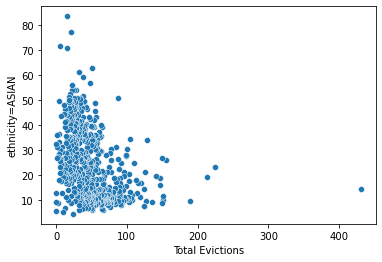

In [8]:
plot_ev('ethnicity=ASIAN')

<AxesSubplot:xlabel='Total Evictions', ylabel='ethnicity=BLACK'>

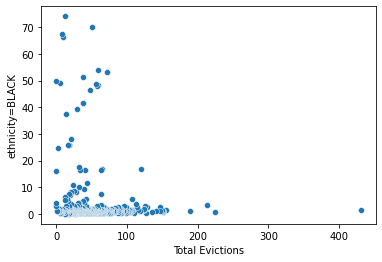

In [9]:
plot_ev('ethnicity=BLACK')

<AxesSubplot:xlabel='Total Evictions', ylabel='ethnicity=WHITE'>

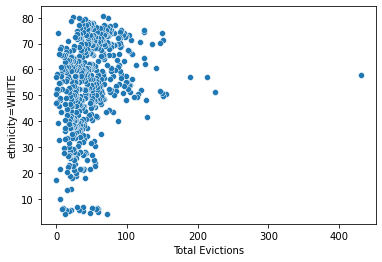

In [10]:
plot_ev('ethnicity=WHITE')

<AxesSubplot:xlabel='Total Evictions', ylabel='children'>

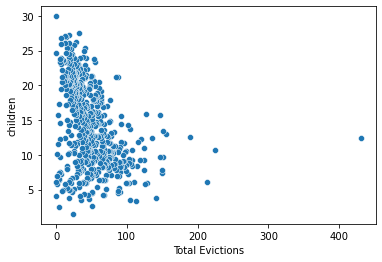

In [11]:
plot_ev('children')

children is promising: remove outliers and look closer

<AxesSubplot:xlabel='Total Evictions', ylabel='children'>

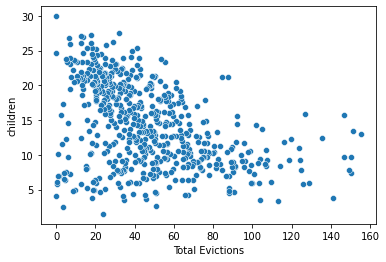

In [12]:
sns.scatterplot(x='Total Evictions', y='children', data=df[df['Total Evictions'] <= 175])

In [13]:
children_reg = df[df['Total Evictions'] <= 175]
cte = children_reg['Total Evictions']
cc = children_reg.children
np.mean(((cte - np.mean(cte))/np.std(cte)) * ((cc - np.mean(cc))/np.std(cc)))

-0.42144716364199053

<AxesSubplot:xlabel='Total Evictions', ylabel='married'>

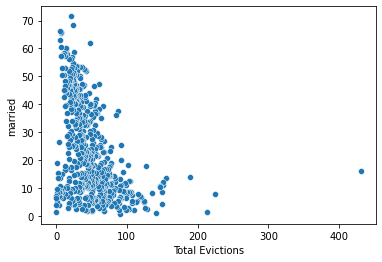

In [14]:
plot_ev('married')

<AxesSubplot:xlabel='Total Evictions', ylabel='married'>

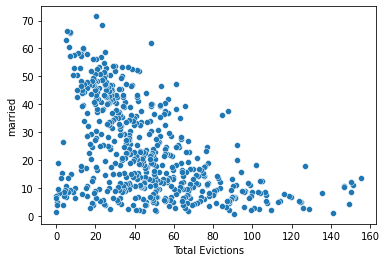

In [15]:
sns.scatterplot(x='Total Evictions', y='married', data=df[df['Total Evictions'] <= 175])

In [16]:
married_reg = df[df['Total Evictions'] <= 175]
mte = married_reg['Total Evictions']
mr = married_reg.married
np.mean(((mte - np.mean(mte))/np.std(mte)) * ((mr - np.mean(mr))/np.std(mr)))

-0.48333012652088014

<AxesSubplot:xlabel='Total Evictions', ylabel='renter'>

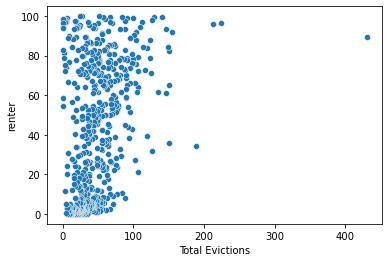

In [17]:
plot_ev('renter')

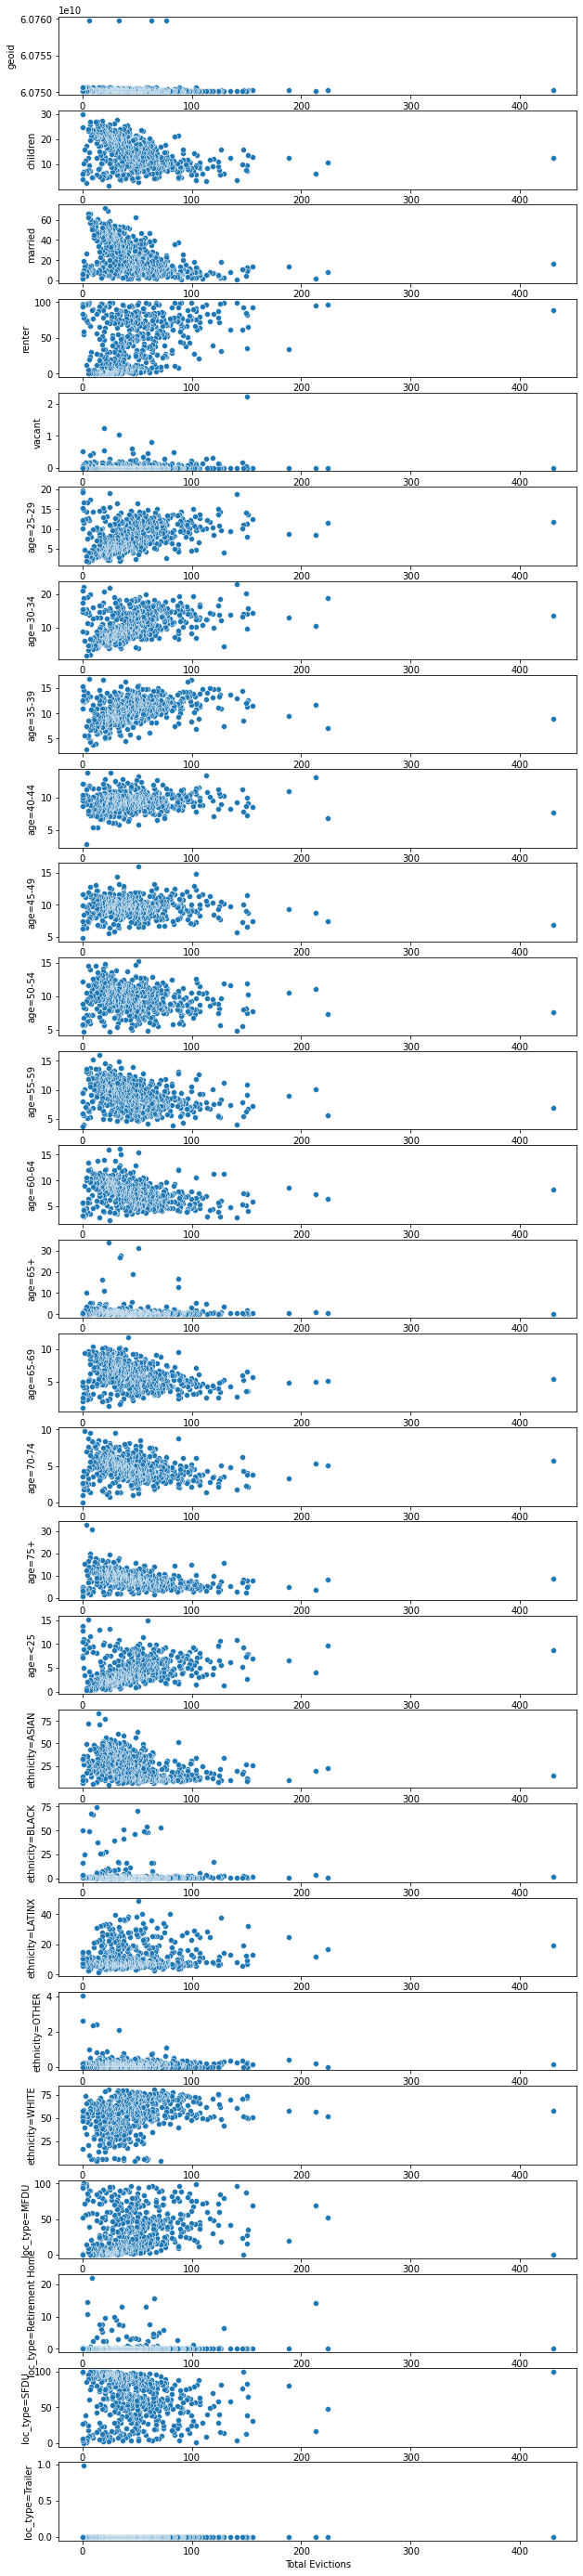

In [41]:
fig, ax = plt.subplots(len(ig.columns)-1,1, figsize=(10,50))

for i, col in enumerate(list(ig.columns)[:-1]):
    sns.scatterplot(data=df, x='Total Evictions', y=col,ax=ax[i])

Only 1 point over 400 evictions
- all SFDU
- High rentership rate
- White and Latinx
- Age diverse

In [19]:
ig.drop(columns='hh_100', inplace=True)
ig['25-39'] = ig['age=25-29'] + ig['age=30-34'] + ig['age=35-39']
ig['<40'] = ig['25-39'] + ig['age=<25']

df['25-39'] = df['age=25-29'] + df['age=30-34'] + df['age=35-39']
df['<40'] = df['25-39'] + df['age=<25']

In [20]:
no_outliers = df[df['Total Evictions'] < 175]
x = no_outliers['Total Evictions']
x_su = (x - np.mean(x))/np.std(x)
for col in list(ig.columns):
    y = no_outliers[col]
    y_su = (y - np.mean(y))/np.std(y)
    print(col, 'r =', np.mean(x_su * y_su))

geoid r = -0.053527020571975364
children r = -0.42144716364199053
married r = -0.48333012652088014
renter r = 0.3765517603591757
vacant r = 0.0998334333465611
age=25-29 r = 0.3811480755708687
age=30-34 r = 0.40178828900850716
age=35-39 r = 0.38002583500991943
age=40-44 r = 0.08777057958830008
age=45-49 r = -0.007348199889039236
age=50-54 r = -0.21741839110629727
age=55-59 r = -0.3218756471554574
age=60-64 r = -0.3623463942132691
age=65+ r = -0.09068321178057553
age=65-69 r = -0.3226605556683463
age=70-74 r = -0.3010413893848385
age=75+ r = -0.3866455087141724
age=<25 r = 0.3102414018733309
ethnicity=ASIAN r = -0.39351819368552704
ethnicity=BLACK r = -0.09373944707187627
ethnicity=LATINX r = 0.07641598900835385
ethnicity=OTHER r = -0.11066112936757208
ethnicity=WHITE r = 0.3113017719781085
loc_type=MFDU r = 0.23694027584851235
loc_type=Retirement Home r = -0.06753177275454941
loc_type=SFDU r = -0.22311364371857054
loc_type=Trailer r = -0.06454259608542529
25-39 r = 0.4161992450584864
<4

send 4 best plots to noah, save as jpg

consider regression using all eviction subvariables

# Regression Topics:
- Children:r = -0.42144716364199053
- Marriage: r = -0.48333012652088014
- Renter: r = 0.3765517603591757
- Asian: r = r = -0.39351819368552704
- Under 40: r = 0.4018607419817531

In [24]:
df = df[['geoid', 'Non Payment', 'Breach', 'Nuisance', 'Illegal Use',
       'Failure to Sign Renewal', 'Access Denial', 'Unapproved Subtenant',
       'Owner Move In', 'Demolition', 'Capital Improvement',
       'Substantial Rehab', 'Ellis Act WithDrawal', 'Condo Conversion',
       'Roommate Same Unit', 'Other Cause', 'Late Payments',
       'Lead Remediation', 'Development', 'Good Samaritan Ends',
       'Total Evictions', 'children', 'married', 'renter', 'ethnicity=ASIAN', '<40']]

df.columns = ['geoid', 'Non Payment', 'Breach', 'Nuisance', 'Illegal Use',
       'Failure to Sign Renewal', 'Access Denial', 'Unapproved Subtenant',
       'Owner Move In', 'Demolition', 'Capital Improvement',
       'Substantial Rehab', 'Ellis Act WithDrawal', 'Condo Conversion',
       'Roommate Same Unit', 'Other Cause', 'Late Payments',
       'Lead Remediation', 'Development', 'Good Samaritan Ends',
       'Total Evictions', 'children', 'married', 'renter', 'asian', 'under_40']

In [38]:
topics = ['children', 'married', 'renter', 'asian', 'under_40']
names = ['Households with Children', 'Married Households', 'Renter Households',
        'Asian Households', 'Household Heads Aged Under 40']
labels = ['Children', 'Married', 'Renter', 'Asian', 'Under 40']
def plot(ig_var, name, label):
    scatter = sns.scatterplot(x='Total Evictions', y=ig_var, data=df[df['Total Evictions'] < 175], color='purple')
    plt.title('Notice Rates vs % ' + name + ' (2019)')
    plt.xlabel('Normalized Eviction Notices per 1000 Households')
    plt.ylabel('% '+ label + ' (2019)')
    fig = scatter.get_figure()
    fig.savefig('long_term_' + ig_var + '.jpg') 

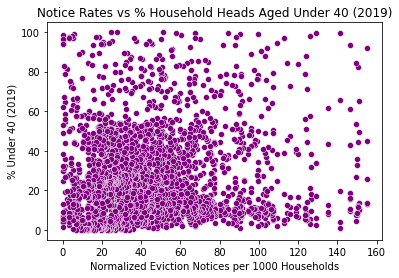

In [39]:
for i in range(len(names)):
    plot(topics[i], names[i], labels[i])

## Children Regression
1. Train-Test Split
2. Find Equation
3. Predict
4. Accuracy/MSE